In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
from typing import List

In [27]:
def weiner_process(alpha: float, h: float, time: float)->np.ndarray:
    N: int = int(time//h)
    X_h = np.zeros(N, dtype="float64")
    for n in range(N-1):
        X_h[n+1] = X_h[n] + (alpha*h)**0.5 * random.randrange(-1, 2, 2) # (-1, 1)
    return X_h

def mean(X_2D: np.ndarray, h: float, time: float)->np.ndarray:
    N: int = int(time//h)
    X_m = np.zeros(N, dtype="float64")
    X_2D = np.transpose(X_2D)

    for t in range(N):
        X_m[t] = np.mean(X_2D[t])
    return X_m

def variance(X_2D: np.ndarray, h: float, time: float)->np.ndarray:
    N: int = int(time//h)
    X_var = np.zeros(N, dtype="float64")
    X_2D = np.transpose(X_2D)

    for t in range(N):
        X_var[t] = np.var(X_2D[t])
    return X_var

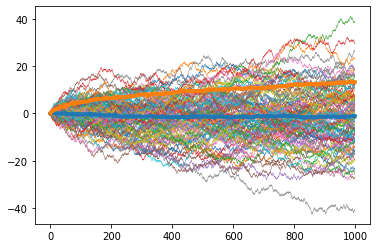

In [39]:
alpha = 2
h = 0.1
time = 100

sample = 100

X_samples = np.empty((0, int(time//h)), dtype="float64") # N = floor(time/h)
for _ in range(sample):
    X: np.ndarray = weiner_process(alpha=alpha, h=h, time=time) #1D ndarray
    X_samples = np.append(X_samples, [X], axis=0) #2D ndarray

sample_mean = mean(X_2D=X_samples, h=h, time=time)
sample_var = variance(X_2D=X_samples, h=h, time=time)

for s in range(sample):
    plt.plot(X_samples[s], linewidth="0.5")
plt.plot(sample_mean, linewidth="4.0")
plt.plot(np.sqrt(sample_var), linewidth="4.0")
plt.show()
